In [17]:
import numpy as np
from keras.preprocessing.image import ImageDataGenerator
from keras.preprocessing import image
from keras.applications import imagenet_utils
import matplotlib.pyplot as plt
from keras.optimizers import Adam
from keras.metrics import categorical_crossentropy
import pandas as pd
from keras.models import Model
import keras
from keras.models import Sequential
from sklearn.metrics import confusion_matrix
from keras.utils.np_utils import to_categorical
from keras.layers import Dense,Activation,Flatten,MaxPool2D,Conv2D,Dropout
from keras.layers.normalization import BatchNormalization
import keras.backend as K
import itertools
%matplotlib inline

In [18]:
from keras.datasets import cifar10
(X_train,y_train),(X_test, y_test) = cifar10.load_data()

In [4]:
X_train.shape

(50000, 32, 32, 3)

In [5]:
y_train.shape

(50000, 1)

In [6]:
X_test.shape

(10000, 32, 32, 3)

In [7]:
y_test.shape

(10000, 1)

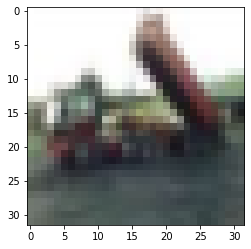

In [3]:
plt.imshow(X_train[2])

## One hot encoding

In [19]:
y_train_one_hot = to_categorical(y_train,10)
y_test_one_hot = to_categorical(y_test,10)

## Normalize pixels

In [20]:
X_train = X_train.astype('float32')/255.0
X_test = X_test.astype('float32')/255.0

## VGG16

In [21]:
vgg16_model = keras.applications.vgg16.VGG16()
vgg16_model.summary()

Model: "vgg16"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_2 (InputLayer)         (None, 224, 224, 3)       0         
_________________________________________________________________
block1_conv1 (Conv2D)        (None, 224, 224, 64)      1792      
_________________________________________________________________
block1_conv2 (Conv2D)        (None, 224, 224, 64)      36928     
_________________________________________________________________
block1_pool (MaxPooling2D)   (None, 112, 112, 64)      0         
_________________________________________________________________
block2_conv1 (Conv2D)        (None, 112, 112, 128)     73856     
_________________________________________________________________
block2_conv2 (Conv2D)        (None, 112, 112, 128)     147584    
_________________________________________________________________
block2_pool (MaxPooling2D)   (None, 56, 56, 128)       0     

In [22]:
#making vgg16 a sequential model

model = Sequential()
for layer in vgg16_model.layers[:-1]: 
    model.add(layer)
    
model.summary()    

Model: "sequential_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
block1_conv1 (Conv2D)        (None, 224, 224, 64)      1792      
_________________________________________________________________
block1_conv2 (Conv2D)        (None, 224, 224, 64)      36928     
_________________________________________________________________
block1_pool (MaxPooling2D)   (None, 112, 112, 64)      0         
_________________________________________________________________
block2_conv1 (Conv2D)        (None, 112, 112, 128)     73856     
_________________________________________________________________
block2_conv2 (Conv2D)        (None, 112, 112, 128)     147584    
_________________________________________________________________
block2_pool (MaxPooling2D)   (None, 56, 56, 128)       0         
_________________________________________________________________
block3_conv1 (Conv2D)        (None, 56, 56, 256)      

In [23]:
for layer in model.layers: 
    layer.trainable = False

In [24]:
model.add(Dense(2, activation = 'softmax'))
model.summary()

Model: "sequential_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
block1_conv1 (Conv2D)        (None, 224, 224, 64)      1792      
_________________________________________________________________
block1_conv2 (Conv2D)        (None, 224, 224, 64)      36928     
_________________________________________________________________
block1_pool (MaxPooling2D)   (None, 112, 112, 64)      0         
_________________________________________________________________
block2_conv1 (Conv2D)        (None, 112, 112, 128)     73856     
_________________________________________________________________
block2_conv2 (Conv2D)        (None, 112, 112, 128)     147584    
_________________________________________________________________
block2_pool (MaxPooling2D)   (None, 56, 56, 128)       0         
_________________________________________________________________
block3_conv1 (Conv2D)        (None, 56, 56, 256)      

In [25]:
model.compile(Adam(lr=0.0001),
              loss='categorical_crossentropy', 
              metrics=['accuracy'])

In [34]:
epochs=5

his = model.fit(X_train,
                y_train_one_hot,
                validation_split = 0.3,
                batch_size=256,
                epochs = epochs)

ValueError: Error when checking input: expected input_2 to have shape (224, 224, 3) but got array with shape (32, 32, 3)